Run PCA on different model neural population trajectories generated by natural song

In [1]:
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.decomposition import PCA

from aux import zscore
from disp import set_plot

cc = np.concatenate

FPS = 30.03
DT = 1/FPS

NR = 224  # original number of responses
NTR = 276  # number of trials

PCA_FILE = 'data/simple/mlv/neur_basic/baker_dyn_pca/pca_results.npy'
DYN_FIT_FILE = 'data'

In [2]:
DF_DYN_PARAM = pd.read_csv('data/simple/neur/baker_dyn_fit_param.csv')

In [3]:
# nonlinear adaptive simulation
def smlt_dyn(i_s, i_p, tau_r, tau_a, x_s, x_p):
    """Simulate response to song inputs."""
    t = np.arange(len(i_s))*DT
    r = np.nan*np.zeros(len(t))
    
    r[0] = 0
    a_s, a_p = 0, 0
    
    for ct, t_ in enumerate(t[1:], 1):
        a_s += ((DT/tau_a) * (-a_s + x_s*i_s[ct]))
        a_p += ((DT/tau_a) * (-a_p + x_p*i_p[ct]))
        r[ct] = r[ct-1] + (DT/tau_r) * (-r[ct-1] + (x_s - a_s)*i_s[ct] + (x_p - a_p)*i_p[ct])
    
    return r

In [4]:
pca_results = np.load(PCA_FILE, allow_pickle=True)[0]
pcs = pca_results['pcs']

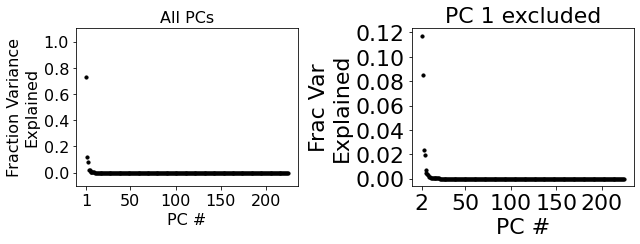

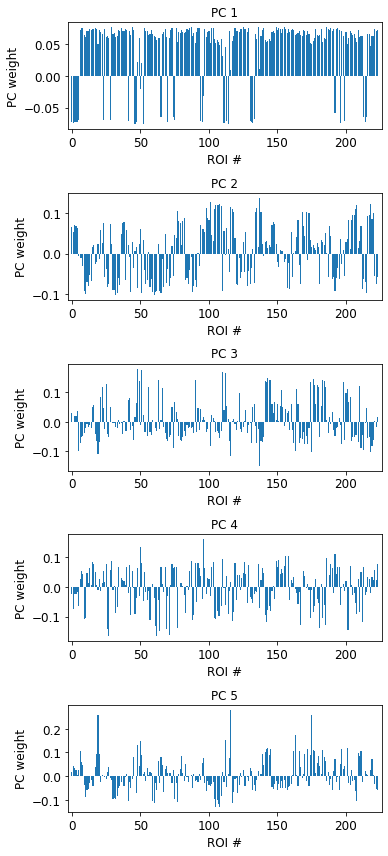

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3.5), tight_layout=True)

axs[0].scatter(1 + np.arange(NR), pca_results['expl_var'], c='k', s=10)
set_plot(axs[0], x_ticks=[1, 50, 100, 150, 200], y_lim=[-.1, 1.1], x_label='PC #', y_label='Fraction Variance\nExplained', title='All PCs', font_size=16)

axs[1].scatter(2 + np.arange(NR-1), pca_results['expl_var'][1:], c='k', s=10)
set_plot(axs[1], x_ticks=[2, 50, 100, 150, 200], x_label='PC #', y_label='Frac Var\nExplained', title='PC 1 excluded', font_size=22)

fig, axs = plt.subplots(5, 1, figsize=(5.5, 12), tight_layout=True)
for cpc, (pc, ax) in enumerate(zip(pcs, axs)):
    ax.bar(range(NR), pc)
    set_plot(ax, x_lim=[-3, NR+2], x_label='ROI #', y_label='PC weight', title=f'PC {cpc+1}', font_size=12)